<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбца" data-toc-modified-id="Переименование-столбца-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбца</a></span></li><li><span><a href="#Исследование-пропусков" data-toc-modified-id="Исследование-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Исправление-данных" data-toc-modified-id="Исправление-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исправление данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Расчет-стоимости-квадратного-метра" data-toc-modified-id="Расчет-стоимости-квадратного-метра-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Расчет стоимости квадратного метра</a></span></li><li><span><a href="#Обработаем-дату/время-время-публикации-объявления" data-toc-modified-id="Обработаем-дату/время-время-публикации-объявления-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Обработаем дату/время время публикации объявления</a></span></li><li><span><a href="#Категоризация-этажа" data-toc-modified-id="Категоризация-этажа-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Категоризация этажа</a></span></li><li><span><a href="#Соотношение-площадей" data-toc-modified-id="Соотношение-площадей-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Соотношение площадей</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)<br>
`balcony` — число балконов<br>
`ceiling_height` — высота потолков (м)<br>
`cityCenters_nearest` — расстояние до центра города (м)<br>
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
`first_day_exposition` — дата публикации<br>
`floor` — этаж<br>
`floors_total` — всего этажей в доме<br>
`is_apartment` — апартаменты (булев тип)<br>
`kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
`last_price` — цена на момент снятия с публикации<br>
`living_area` — жилая площадь в квадратных метрах (м²)<br>
`locality_name` — название населённого пункта<br>
`open_plan` — свободная планировка (булев тип)<br>
`parks_around3000` — число парков в радиусе 3 км<br>
`parks_nearest` — расстояние до ближайшего парка (м)<br>
`ponds_around3000` — число водоёмов в радиусе 3 км<br>
`ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
`rooms` — число комнат<br>
`studio` — квартира-студия (булев тип)<br>
`total_area` — площадь квартиры в квадратных метрах (м²)<br>
`total_images` — число фотографий квартиры в объявлении<br>

Первым этапом изучим данные, проанализируем пропуски и исправим их там, где это возможно, изменим формат столбцов с которыми будем работать.

Вторым этапом добавим всомогательные расчеты:
* цена квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры; варианты — первый, последний, другой
* соотношение жилой и общей площади, а также отношение площади кухни к общей

Определим характеристики типовой квартиры находящейся в продаже и время, требуемое для продажи.

Далее изучим какие факторы влияют на стоимость квартиры в целом в Ленинградской области и в центре Санкт-Петербурга:
* площадь квартры
* число комнат
* высота потолков
* этаж (первый, последний, другой)
* время продажи: день, месяц, год

Проверим в каких городах чаще всего продают квартиры и как в них отличаются стоимости квартир.

## Изучение данных из файла

Прочитаем файл и посмотрим основную информацию.

In [13]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [16]:
pd.set_option('display.max_columns', 50) 
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [17]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

1. Переименовать столбец<br>
`cityCenters_nearest` - привести к змеиному регистру<br>
<br>
2. Ислледовать пропуски в этих столбцах<br>
`ceiling_height` - для анализа требуется, но данных для заполнения не хватает<br>
`floors_total`- обработать пропуски<br>
`living_area`- обработать пропуски<br>
`is_apartment` - для анализа не требуется<br>
`kitchen_area`- обработать пропуски<br>
`balcony`- для анализа не требуется<br>
`locality_name` - для анализа требуется, но данных для заполнения не хватает<br>
`airports_nearest` - для анализа не требуется<br>
`cityCenters_nearest` - для анализа не требуется<br>
`parks_around3000` - для анализа не требуется<br>
`parks_nearest`- для анализа не требуется<br>
`ponds_around3000`- для анализа не требуется<br>
`ponds_nearest`- для анализа не требуется<br>
`days_exposition`- для анализа требуется, но данных для заполнения не хватает<br>
<br>
3. Изменить формат столбцов<br>
`first_day_exposition` - дата/время<br>
`floors_total` - целочисленный<br>
<br>
4. Более детально посмотреть на подозрительные значения в столбцах:<br>
`ceiling_height`- значение 100<br>


## Предобработка данных

### Переименование столбца

Переименуем столбец `cityCenters_nearest` в `city_сenters_nearest` 

In [18]:
df = df.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'})

Проверим

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Исследование пропусков

Узнаем процент пропусков в столбцах с пропусками

In [20]:
isna_columns = []
for i in df.columns:
    if df[i].isna().sum() > 0:
        isna_columns.append([i,(df[i].isna().sum() * 100 /len(df)).round(2)])
isna_columns
        

[['ceiling_height', 38.8],
 ['floors_total', 0.36],
 ['living_area', 8.03],
 ['is_apartment', 88.29],
 ['kitchen_area', 9.61],
 ['balcony', 48.61],
 ['locality_name', 0.21],
 ['airports_nearest', 23.38],
 ['city_сenters_nearest', 23.29],
 ['parks_around3000', 23.28],
 ['parks_nearest', 65.91],
 ['ponds_around3000', 23.28],
 ['ponds_nearest', 61.56],
 ['days_exposition', 13.42]]

Бросается в глаза большой процент пропусков в поле `is_apartment`. Нужно задать вопрос разработчикам - нет ли ошибки в выгрузке, или же это поле не является обязательным для заполнения.

В столбце `floors_total` пропуски в строках, которые составляют меньше процента от всех данных. Заполним их медианным значением для каждого значения 'floor', у которого есть пропуск в `floors_total`.

In [10]:
df['floors_total'] = df['floors_total'].fillna(df.groupby('floor')['floors_total'].transform("median"))

 Проверим

In [25]:
df['floors_total'].isna().sum()

0

Заполним пропуски в `living_area`. Будем заполнять медианным значениям для схожих квартир с такой же площадью и количеством комнат. Для этого разобъем все квартиры по категориям площади с шагом 30м2: до 30, от 30 и до 60, и т.д. Для схожих квартир по параметрам "категория площади" и количество комнат, посчитаем медианное значение жилой площади. Шаг 30 подобран экспериментальным путем, так, чтобы при минимальном значение позволял исправить максимальное количество пропусков.

In [13]:
def area_type(row):
    total_area = row['total_area']
    for i in range(0, math.ceil(df['total_area'].max()+30), 30):
        if  0 <= (i - math.ceil(total_area)) < 30: 
            return i         
df['area_type'] = df.apply(area_type,axis=1)

In [14]:
df['living_area'] = df['living_area'].fillna(df.groupby(['area_type', 'rooms'])['living_area'].transform("median"))

Проверим, сколько осталось пропусков

In [15]:
df['living_area'].isna().sum()

10

Исправим это пропуск медианным значением жилой площади только по категории площади квартиры, без учета количества комнат.

In [16]:
df['living_area'] = df['living_area'].fillna(df.groupby(['area_type'])['living_area'].transform("median"))

Проверим

In [17]:
df['living_area'].isna().sum()

0

Применим схожий подход для заполнения пропусков в `kitchen_area`


In [18]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['area_type', 'rooms'])['kitchen_area'].transform("median"))

In [19]:
df['kitchen_area'].isna().sum()

205

Исправим эти пропуски медианным значением площади кухни только по категории площади квартиры, без учета количества комнат.

In [20]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['area_type'])['kitchen_area'].transform("median"))

Проверим

In [21]:
df['kitchen_area'].isna().sum()

0

По 39% объявлений не заполнена высота потолков. Исключить такие объявления из анализа мы не можем, т.к. существенно сократит объем выборки, но и заполнить эти пропуски тоже не можем, т.к. недостаточно для этого данных.

### Изменение типов данных

Приведем формат столбца `first_day_exposition` в формат даты/времени


In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

 Приведем формат столбца `floors_total` к целочисленному

In [23]:
df['floors_total'] = df['floors_total'].astype('int')

Проверим

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Исправление данных

Посмотрим более внимательно на кватиры с высотой потолка больше 15 метров

In [25]:
df[df['ceiling_height'] > 15]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_type
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,7.9,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,60
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,60
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,NaN,False,True,6.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,30
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,60
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,60
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,60
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,90
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,60
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,60


Можно предположить, что при вводе значения позникла ошибка и в результате которой значение стало больше нужно в 10 раз. Разделим эти значения на 10

In [26]:
df.loc[df['ceiling_height'] > 15, 'ceiling_height'] = df.loc[df['ceiling_height'] > 15, 'ceiling_height'] / 10

In [27]:
df[df['ceiling_height'] > 15]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_type


## Расчёты и добавление результатов в таблицу

#### Расчет стоимости квадратного метра

Расчитаем стоимость квадратного метра

In [28]:
df['square_meter_cost'] = df['last_price'] / df['total_area']

#### Обработаем дату/время время публикации объявления

Добавим в таблицу день недели, месяц и год публикации объявления

In [29]:
df['publication_week_day'] = df['first_day_exposition'].dt.weekday

In [30]:
df['publication_month'] = df['first_day_exposition'].dt.month

In [31]:
df['publication_year'] = df['first_day_exposition'].dt.year

#### Категоризация этажа

Добавим в таблицу: этаж квартиры — первый (1), последний(0), другой(2)

In [33]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    
    if floor == floors_total:
        return 'последний'
    
    return 'другой'

df['floor_type'] = df.apply(floor_type, axis=1) 

Проверим

In [34]:
df[['floors_total', 'floor', 'floor_type']].drop_duplicates().head(20)

,floors_total,floor,floor_type
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,9,другой
4,14,13,другой
5,12,5,другой
6,26,6,другой
7,24,22,другой
8,27,26,другой
9,9,7,другой


#### Соотношение площадей

 Добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей

In [35]:
df['living_to_all_area'] = df['living_area'] / df['total_area']
df['kitchen_to_all_area'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

 Исследуем параметры: площадь, цена, число комнат, высота потолков

In [36]:
df[['total_area','last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.729608
std,35.654083,1.088701e+07,1.078405,0.319850
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.510000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,14.000000


Типовой квартирой для продажи является двух комнатные квартиры площадью 52м2 за 4,6 млн рублей с высотой потолков 2.65

Построим гистограму для площади квартиры

<AxesSubplot:>

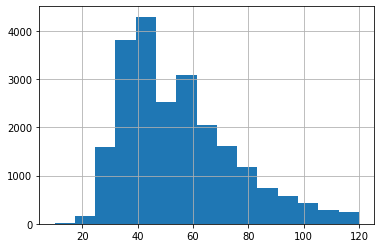

In [37]:
df['total_area'].hist(bins=15, range=(10,120))

<AxesSubplot:>

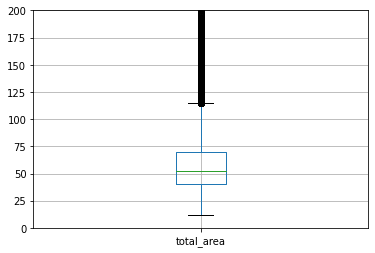

In [38]:
plt.ylim(0,200)
df.boxplot(column='total_area')

Распределение отличается от нормального, с двумя пиками в райне 40 и 60 метров. Для анализа можем отбросить значения меньше 20 и больше 150.

Построим гистограмму для стоимости квартиры

<AxesSubplot:>

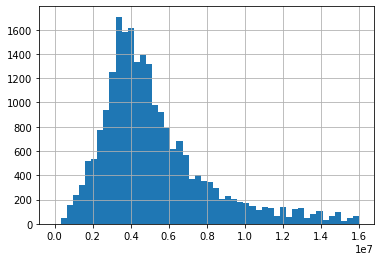

In [39]:
df['last_price'].hist(bins=50, range=(0,16000000))

<AxesSubplot:>

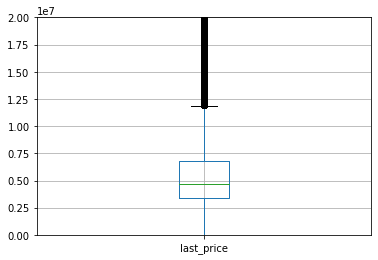

In [40]:
plt.ylim(0,20000000)
df.boxplot(column='last_price')

Распределение похоже на нормальное. Из анализа можно исключить квартры стоимостью меньше 100000 и больше 20000000

<AxesSubplot:>

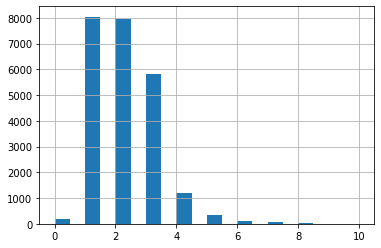

In [41]:
df['rooms'].hist(bins=20, range=(0,10))

Самые популярные кватиры  - 1 и 2 двух комнатые. Из анализа можно исключить квартиры с количеством комнат больше 6

Построим гистограму для высоты потолков

<AxesSubplot:>

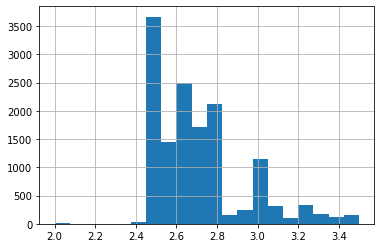

In [42]:
df['ceiling_height'].hist(bins=20, range=(2,3.5))

Нужно учитывать, что  по 38% квартир высота потолков не заполнена. Поэтому данные могут быть искажены. Самые популярные предложения квартир с высостой потолков - около 2,5 метра. 

<AxesSubplot:>

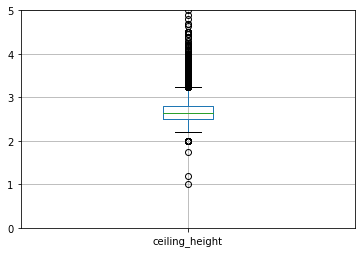

In [43]:
plt.ylim(0,5)
df.boxplot(column=['ceiling_height'])

Проверим сколько времени занимает продажа квартиры

In [44]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

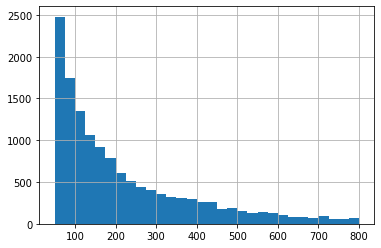

In [45]:
df['days_exposition'].hist(bins=30, range=(50,800))

<AxesSubplot:>

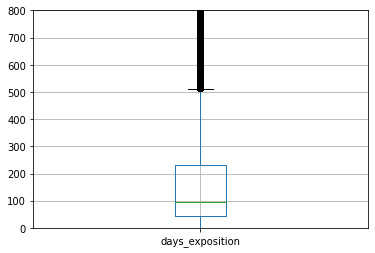

In [46]:
plt.ylim(0,800)
df.boxplot(column=['days_exposition'])

<AxesSubplot:>

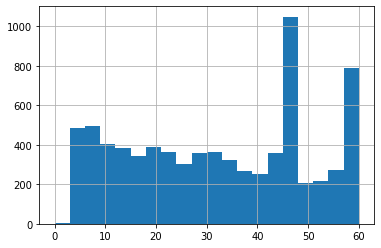

In [47]:
df['days_exposition'].hist(bins=20, range=(0,60))

Обычное время продажи составляет до 500 дней, чаще всего от около двух месяцев. Можно сказать, что если квартира была продана в первые два месяца то это быстрая продажа, продажи свыше 600 дней можно считать выбросами.

Отберем данные без выбросов

In [48]:
df_good = df.query('(20 <= total_area <= 150) & (100000 <= last_price <= 20000000) & (rooms <= 6)  & (days_exposition <= 600)')

Проверим какой процент исключили

In [49]:
len(df_good)/len(df)

0.7899489429933753

Проверим зависимость цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также проверим зависимость от даты размещения: дня недели, месяца и года.

In [51]:
df_good['last_price'].corr(df_good['total_area'])

0.7541290958735082

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

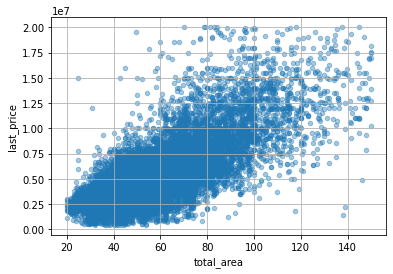

In [52]:
df_good.plot(kind='scatter', y='last_price', x='total_area', alpha=0.4, grid=True)

Видим прямую зависимость между площадью квартиры и ее стоимость. При это разброс цен для квартир больше 90 кв.м. значительно увеличивается.

In [53]:
df_good['last_price'].corr(df_good['rooms'])

0.4774128979818787

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

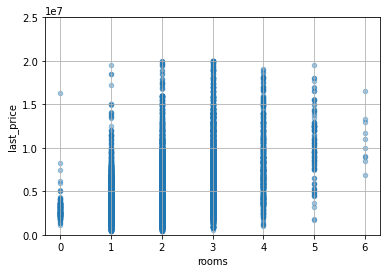

In [54]:
df_good.plot(kind='scatter', y='last_price', x='rooms', alpha=0.4, grid=True, ylim=(0,25000000))

Есть небольшая взаимосвязь количества комнат и стоимостью квартиры, но при этом при увеличении количества комнат увеличивается и разброс цен.

<AxesSubplot:xlabel='floor_type'>

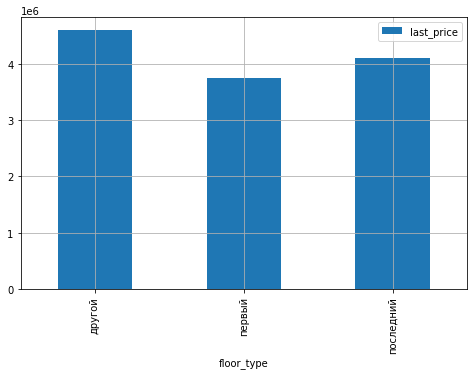

In [56]:
(df_good
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(8, 5))
)

Первый и последние этажи дешевли других этажей, при этом первые этажи дешевле последних.

Для оценки связи цены квартиры и расстояния до центра, добавим категорию "расстояние до центра в километрах с шагом 5 км"

In [58]:
def center_5km(row):
    city_сenters_nearest = row['city_сenters_nearest']
    for i in range(0, math.ceil(df['city_сenters_nearest'].max()+5000), 5000):
        try:
            if  0 <= (i - math.ceil(city_сenters_nearest)) < 5000: 
                return i/1000
        except:
            pass
df_good['center_5km'] = df_good.apply(center_5km, axis=1)

/tmp/ipykernel_154/3116239787.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good['center_5km'] = df_good.apply(center_5km, axis=1)


<AxesSubplot:xlabel='center_5km'>

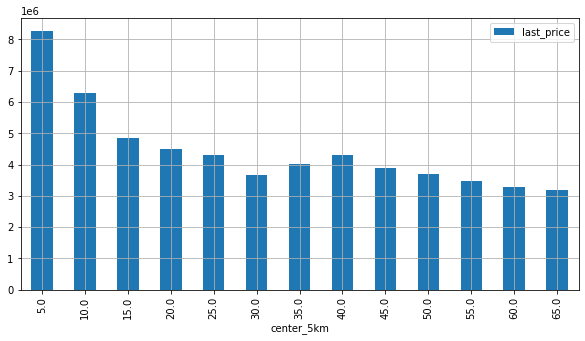

In [60]:
(df_good
    .pivot_table(index='center_5km', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(10, 5))
)

Видим снижение цены с увеличеним расстояния до цента. Самые дорогие квартиры - в радиусе 10 км до центра.

<AxesSubplot:xlabel='publication_week_day'>

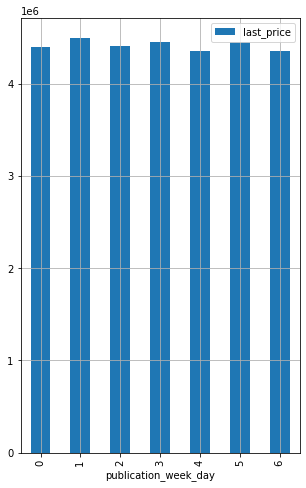

In [62]:
(df_good
    .pivot_table(index='publication_week_day', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(5, 8))
)

У квартир в объявлениях размещенных во вторник, четверг и субботы, более высокая стоимость, чем у объявлениях, размещенных в другие дни.

<AxesSubplot:xlabel='publication_month'>

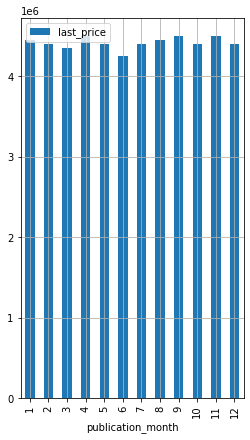

In [64]:
(df_good
    .pivot_table(index='publication_month', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(4, 7))
)

Чаше всего квартиры продают в апреле, сентябре и ноябре. Летом сезонный спад продаж.

<AxesSubplot:xlabel='publication_year'>

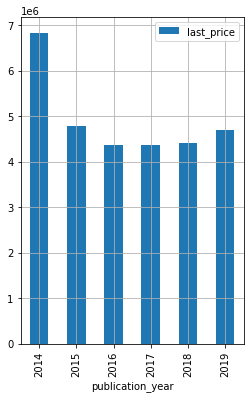

In [66]:
(df_good
    .pivot_table(index='publication_year', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(4, 6))
)

Самые высокие цены на квартиры были в 2014 году, после чего наступил спад и стагнация до 2018 года, в 2019 цены на квартиры немного подросли.

Результат оказался ожидаем - стоимость квартиры в большей степени зависит от плащиди и количества комнат. Для квартир площадью более 90 кв.м разброс цен значительно увеличивается.<br>

Количество комнат влияет на стомость, но только если к квартире две комнаты или меньше.<br>

Первый и последние этажи дешевли других этажей, при этом первые жтажи дешевле последних.<br>

Также есть обратная зависимость от растояния до центра - чем меньше расстояние до центра, тем выше цена. Самые дорогие квартиры находятся на расстоянии 10 км от центра.<br>

У квартир в объявлениях размещенных во вторник, четверг и субботы, более высокая стоимость, чем у объявлениях, размещенных в другие дни.<br>

Чаше всего квартиры продают в апреле, сентябре и ноябре. Летом сезонный спад продаж.<br>

Самые высокие цены на квартиры были в 2014 году, после чего наступил спад и стагнация до 2018 года, в 2019 цены на квартиры немного подросли.<br>

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [67]:
posts = df_good.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='locality_name'>

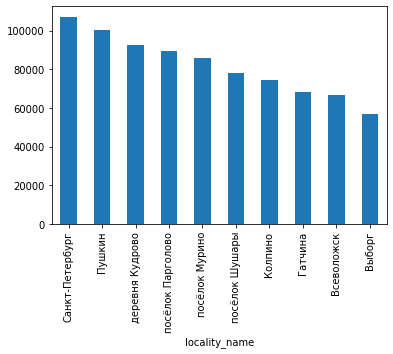

In [70]:
(df_good
     .query('locality_name in @posts.index')
     .groupby('locality_name')['square_meter_cost'].mean()
     .sort_values(ascending=False)
     .plot(kind='bar')   
)

Самые высокие цены в Санкт_Петербурге, а низкие - в Выборге

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name).Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [71]:
df_sp = df_good[df_good['locality_name'] == "Санкт-Петербург"]

In [72]:
df_sp = df_sp[df_sp['city_сenters_nearest'].isna() == False]

In [74]:
df_sp['center_km'] = (df_sp['city_сenters_nearest'] / 1000).round(0)

<AxesSubplot:xlabel='center_km'>

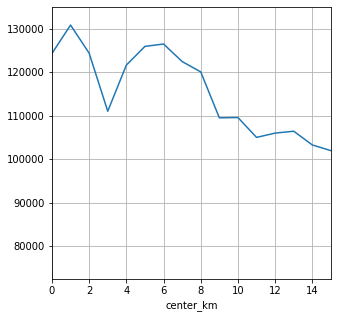

In [75]:
df_sp.groupby('center_km')['square_meter_cost'].mean().plot( xlim=(0, 15),  grid=True, figsize=(5, 5))

График меняется в районе 9 км.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделитм факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [76]:
df_sp_center = df_sp[(df_sp['center_km']<=9) & (df_sp['locality_name'] == 'Санкт-Петербург')]


In [77]:
df_sp_center[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3093.000000,3.093000e+03,3093.000000,1904.000000
mean,67.815487,8.048750e+06,2.324281,2.962862
std,26.086553,3.591219e+06,1.019814,0.382691
min,20.000000,1.600000e+06,0.000000,2.400000
25%,46.300000,5.390000e+06,2.000000,2.700000
50%,64.000000,7.300000e+06,2.000000,3.000000
75%,84.680000,9.983000e+06,3.000000,3.150000
max,150.000000,2.000000e+07,6.000000,10.000000


Судя по мединным значениям типа квартира в центре - трехкомнатная, площадью 85 кв, с высотой потолков 3.2 м, стоимстью 7.3 млн. рублей. Приэтом судя по стандартному отклонению стоимость сильно варьируется.

<AxesSubplot:>

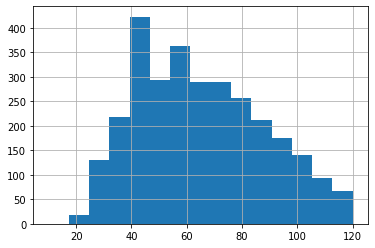

In [78]:
df_sp_center['total_area'].hist(bins=15, range=(10,120))

<AxesSubplot:>

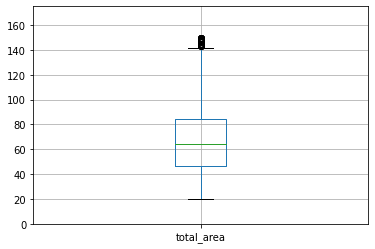

In [79]:
plt.ylim(0,175)
df_sp_center.boxplot(column='total_area')

В центре Петербурга самые популярные предоложения на квартиры площадью около 40 и 60 кв.м, что сопоставимо со всеми предложениями.

<AxesSubplot:>

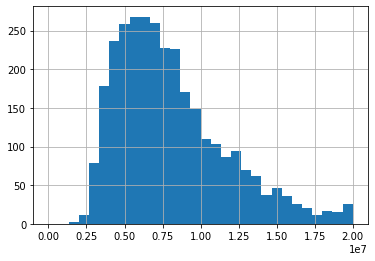

In [80]:
df_sp_center['last_price'].hist(bins=30, range=(0,20000000))

<AxesSubplot:>

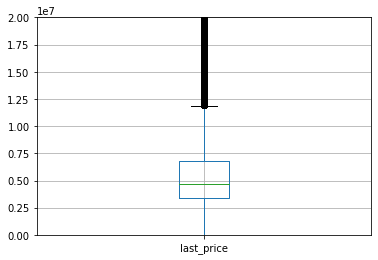

In [81]:
plt.ylim(0,20000000)
df.boxplot(column='last_price')

Самые популярные предложения в центре Петербурга на квартиры стоимость от 5 до 7,5 млн. рублей.

<AxesSubplot:>

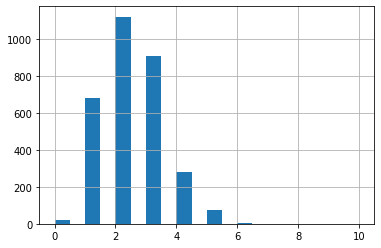

In [82]:
df_sp_center['rooms'].hist(bins=20, range=(0,10))

В центре Петербурга самые популярные 2х и 3х комнатные квартиры.

<AxesSubplot:>

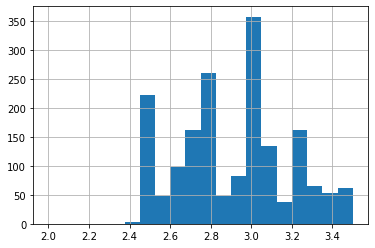

In [83]:
df_sp_center['ceiling_height'].hist(bins=20, range=(2,3.5))

В центре Петербугра самые популярные предложения квартир с высотой потолков около 3 метров.

In [84]:
df_sp_center['last_price'].corr(df_sp_center['total_area'])

0.7385029091201717

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

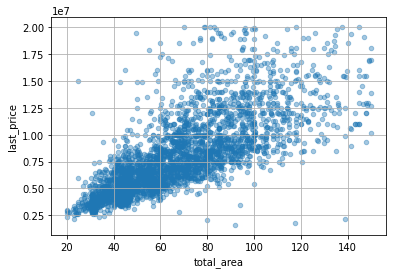

In [85]:
df_sp_center.plot(kind='scatter', y='last_price', x='total_area', alpha=0.4, grid=True)

In [86]:
df_sp_center['last_price'].corr(df_sp_center['rooms'])

0.4730461793358198

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

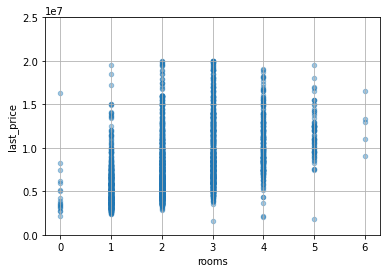

In [87]:
df_sp_center.plot(kind='scatter', y='last_price', x='rooms', alpha=0.4, grid=True, ylim=(0,25000000))

Есть небольшая взаимосвязь количества комнат и стоимостью квартиры, но при этом при увеличении количества комнат увеличивается и разброс цен

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>]], dtype=object)

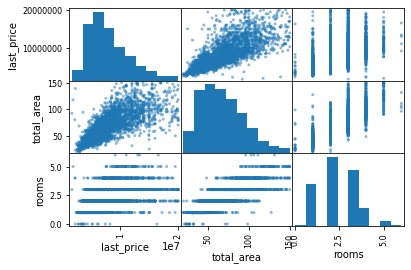

In [88]:
df_sp_center_matrix =df_sp_center[['last_price', 'total_area','rooms']]
pd.plotting.scatter_matrix(df_sp_center_matrix)

<AxesSubplot:>

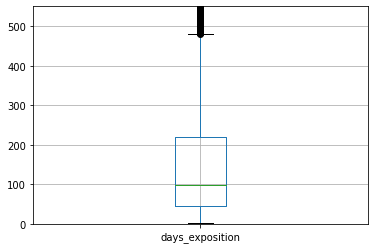

In [90]:
plt.ylim(0,550)
df_sp_center.boxplot(column=['days_exposition'])

<AxesSubplot:>

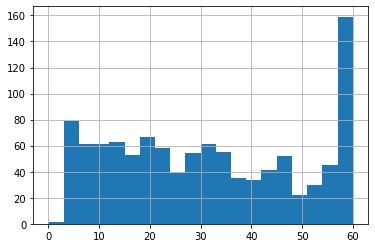

In [91]:
df_sp_center['days_exposition'].hist(bins=20, range=(0,60))

Скорость  продаж квартир в центре Петербурга сопоставима с общей скоростью по рынку.

<AxesSubplot:xlabel='floor_type'>

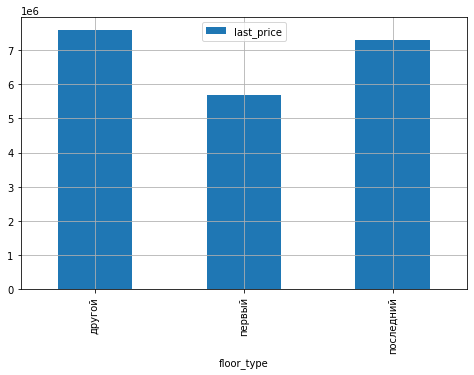

In [93]:
(df_sp_center
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(8, 5))
)

Первый и последние этажи дешевли других этажей, при этом первые этажи дешевле последних.

<AxesSubplot:xlabel='center_km'>

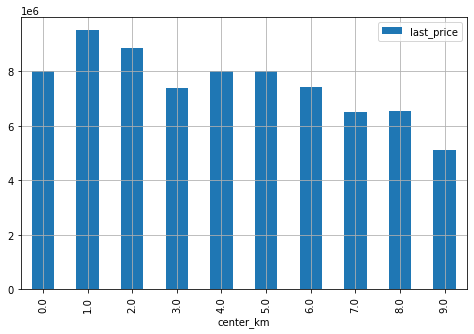

In [95]:
(df_sp_center
    .pivot_table(index='center_km', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(8, 5))
)

В центре Петербурга самые дешевые квартиры находятся на расстоянии 3 км от центра.

<AxesSubplot:xlabel='publication_week_day'>

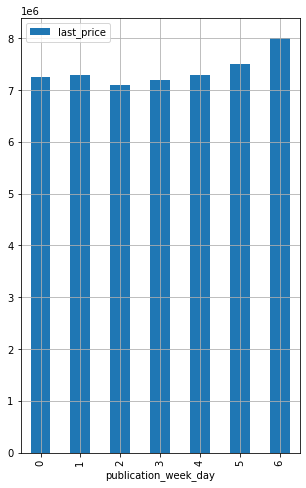

In [97]:
(df_sp_center
    .pivot_table(index='publication_week_day', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(5, 8))
)

В центре Петербурга самые дорогие квартиры продаются по воскресеньям

<AxesSubplot:xlabel='publication_month'>

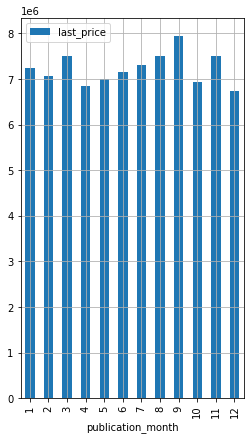

In [99]:
(df_sp_center
    .pivot_table(index='publication_month', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(4, 7))
)

В центре Петербурга наблюдается рост цен на квартиры с апреля по сентябрь, что не типично для рынка в целом. В октябре и декабре наблюдается спад, как в целом по рынку.

<AxesSubplot:xlabel='publication_year'>

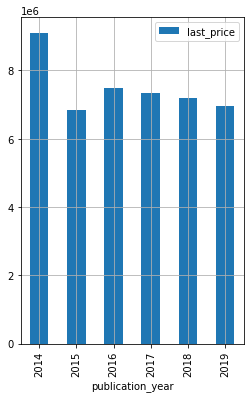

In [101]:
(df_sp_center
    .pivot_table(index='publication_year', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(4, 6))
)

После максимальных цен в 2014, в 2015 был спад с последующим небольши ростом в 2016 году, после чего цены постепенно снижаются.

## Общий вывод

Вывод в первой версии работы:
На стоимость квартиры влияет расстояние до центра, площадь и количество комнат. При этом количество комнат в большей степени влияет на квартиры, отдаленые от центра. 

При исследовании данных обнаружены пропуски в цледующих полях:
* `ceiling_height`  - 39%
* `floors_total` - 0.4%
* `living_area` - 8%
* `kitchen_area` - 9.6%
* `is_apartment` - 88%
* `balcony` - 48.61%
* `locality_name` - 0.2%
* `airports_nearest` - 23%
* `city_сenters_nearest` - 23%
* `parks_around3000` - 23%
* `parks_nearest` - 66%
* `ponds_around3000` - 23%
* `ponds_nearest` - 62%
* `days_exposition` - 13%

Пропуски в полях `floors_total`, `living_area`, `kitchen_area` были заменены на медианные значения.<br>

Из-за большого количество пропусков данных о высоте потолка (39%) результаты анализа могут быть искажены.

Для 23 квартир высота потолков была указана больше 20 метров, эти значения разделили на 10.

Среди 10 город с самым большим количеством объявлений, самые высокие цены за кв.м. в Санкт-Петербурге (100 тыс. рублей за кв.м), а самые низкие в Выборге (60 тыс. рублей)

По графику изменения стоимости квартиры в зависимости от центра определили центр Санкт-Петербурга - 9 км.

Характеристики типовой квартиры для продажи: две комнатны, площадь 52м2, стоимостью 4,6 млн рублей, с высотой потолков 2.65 м.

В центре Петербурга картина немного иная: двух или трех комнатная, площадью 85 кв, с высотой потолков 3.2 м, стоимстью 7.3 млн. рублей. 

На стоимость квартиры влияет этаж - первые и последние этажи более дешевые.

На стоимость квартиры влияет площадь квартиры, при этом для квартир площадью более 90 кв. метров, значительно увеличивается разброс цен.

Также есть обратная зависимость от растояния до центра - чем меньше расстояние до центра, тем выше цена.

Есть небольшая взаимосвязь количества комнат и стоимостью квартиры, но при этом при увеличении количества комнат увеличивается и разброс цен

В 2014 на рынке недвижимости наблюдались самые высокие цены, после чего в 2015 последовал спад. И если в целом на рынке наблюдалась стогнация до 2019 года, то продажи квартир в центре Петербурга показали небольшой рост в 2016 году с последющим спадом.

Среднее время продажи квартиры составляет 2 месяца.

Динамика продаж квартир в целом на рынке и центре Петербурга различается. Если на рынке в летний период наблюдаетс спад, то центре Петербурга - рост количества предложений. Март, октябрь и декабрь отличаются низким количеством предложений по продаже квартир.

У квартир в объявлениях, размещенных во вторник, четверг и субботы, более высокая стоимость, чем у объявлениях, размещенных в другие дни. При этом для квартир  в центре Петербурга картина иная: наиболее высокие цены у квартир, выставленных на продажу в суботу и воскресенье. 
